### Slides Link https://github.com/Make-School-Courses/DS-1.1-Data-Analysis/blob/master/Notebooks/Pandas_Titanic.ipynb

In [2]:
import numpy as np
import pandas as pd

df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## BE WARY OF HOW YOU INPUT INFORMATION

#### Depending on how you input your info, in this example with pd.crosstab, you get different results that relate to different concepts

In [3]:
### THIS REPRESENTS THE DEATH PERCENT OF EACH SEX
pd.crosstab(df['Sex'], df['Survived'], normalize='index')

Survived,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908


In [4]:
### THIS REPRESENTS OF THOSE WHO DIED, WHAT THEIR SEX WAS
pd.crosstab(df['Survived'], df['Sex'], normalize='index')

Sex,female,male
Survived,,
0,0.147541,0.852459
1,0.681287,0.318713


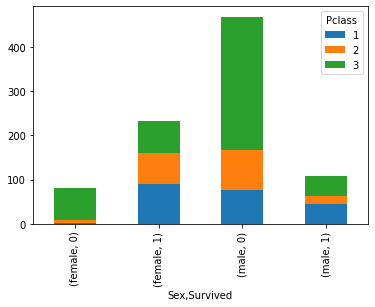

In [7]:
df.groupby(['Sex', 'Survived'])['Pclass'].value_counts().unstack().plot(kind='bar',stacked=True)

# Day 4 - Combine Dataframes

## Slide Links : https://github.com/Make-School-Courses/DS-1.1-Data-Analysis/blob/master/Notebooks/Pandas_Merge_Concatenate.ipynb

In [11]:
import pandas as pd

adf = pd.DataFrame(data={'x1': ['A', 'B', 'C'], 'x2' : [1, 2, 3]})

In [10]:
bdf = pd.DataFrame(data={'x1': ['A', 'B', 'D'], 'x3' : ['T', 'F', 'T']})

### With Merge, the primary dataframe is used as the source; From there only corresponding information is added into the new data frame, Thus, D is not added, and C does not have a value for x3

### This is because the merge is by how = 'left' where adf is the left most dataframe

In [12]:
pd.merge(adf, bdf, how='left')

,x1,x2,x3
0,A,1,T
1,B,2,F
2,C,3,NaN


### Conversely, all things being the same, but going from the right, bdf is the primary dataframe and C is omitted and D does not have a x2 value

In [14]:
pd.merge(adf, bdf, how='right')

,x1,x2,x3
0,A,1.0,T
1,B,2.0,F
2,D,NaN,T


### 3 or more dataframes should be merged 2 at a time

In [15]:
pd.merge(adf, bdf, how='inner')

,x1,x2,x3
0,A,1,T
1,B,2,F


### Inner ignores any data that has no common threads (What is held in common), inner is also the default how value

In [16]:
pd.merge(adf, bdf)

,x1,x2,x3
0,A,1,T
1,B,2,F


### Outer merges all data

In [22]:
pd.merge(adf, bdf, how = 'outer')

,x1,x2,x3
0,A,1.0,T
1,B,2.0,F
2,C,3.0,NaN
3,D,NaN,T


### cdf given below, would not be able to merge, as x1 is necessary (x1 represents the primary identifier of the data, thus data without one would not have an identification)

In [17]:
cdf = pd.DataFrame(data={'x2': ['1', '2', '3'], 'x3' : ['T', 'F', 'T']})

In [24]:
pd.concat([adf, bdf], sort=True)

,x1,x2,x3
0,A,1.0,NaN
1,B,2.0,NaN
2,C,3.0,NaN
0,A,NaN,T
1,B,NaN,F
2,D,NaN,T


In [21]:
pd.concat([adf, bdf], axis=1)

,x1,x2,x1,x3
0,A,1,A,T
1,B,2,B,F
2,C,3,D,T


## To Combine Dataframes we have:

### join

1 - left

2 - right

3 - inner

4 - outer

### merging

5 - append

6 - concat

7 - merge



## Reshaping

1 - melt function

2 - pivot function

3 - nlargest

In [25]:
# Initialize the data and dataframe
data = {'weekday': ["Monday", "Tuesday", "Wednesday", 
         "Thursday", "Friday", "Saturday", "Sunday"],
        'Person 1': [12, 6, 5, 8, 11, 6, 4],
        'Person 2': [10, 6, 11, 5, 8, 9, 12],
        'Person 3': [8, 5, 7, 3, 7, 11, 15]}
df = pd.DataFrame(data, columns=['weekday',
        'Person 1', 'Person 2', 'Person 3'])

In [26]:
df

,weekday,Person 1,Person 2,Person 3
0,Monday,12,10,8
1,Tuesday,6,6,5
2,Wednesday,5,11,7
3,Thursday,8,5,3
4,Friday,11,8,7
5,Saturday,6,9,11
6,Sunday,4,12,15


In [27]:
# Reshape Pandas Data With Melt
# the current "weekday" column will be our identifier variable
# therefore, "Person1", "Person2" and "Person3" will now all unpivot into rows under a new variable column "Person"
# The original value under "Person#" will now reside in a new value column called "Score"
# Once melted, we'll display the value (Score) for every variable (Person), associating each variable with it's identifier variable (weekday)
melted = pd.melt(df, id_vars=["weekday"], 
                 var_name="Person", value_name="Score")


In [28]:
melted

,weekday,Person,Score
0,Monday,Person 1,12
1,Tuesday,Person 1,6
2,Wednesday,Person 1,5
3,Thursday,Person 1,8
4,Friday,Person 1,11
5,Saturday,Person 1,6
6,Sunday,Person 1,4
7,Monday,Person 2,10
8,Tuesday,Person 2,6
9,Wednesday,Person 2,11


In [29]:

# initialize a dataframe
df = pd.DataFrame({'a': [1, 10, 8, 11, -1],'b': list('abdce'), 'c': [1.0, 2.0, np.nan, 3.0, 4.0]})
df

,a,b,c
0,1,a,1.0
1,10,b,2.0
2,8,d,NaN
3,11,c,3.0
4,-1,e,4.0


### Data slicing based on how much we want (3) and what data it primarily references (a)

In [30]:
df.nlargest(3, 'a')

,a,b,c
3,11,c,3.0
1,10,b,2.0
2,8,d,NaN


### Cheat Sheet on Pandas methods: https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf